# Mobile Data Explanatory Data Analysis

TalkingData prepared a dataset for predicting the demographic based on multiple factors such as: app usage, location, age, ect. Using unsupervised learning I'll attempt to find any indicators of demographics. This sort of knowledge is incredibly valuable to phone manufacturers. 

[DATA](https://www.kaggle.com/c/talkingdata-mobile-user-demographics)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Finding Characterstics of the Gender Age File - Train Data

In [2]:
df_train = pd.read_csv('data/mobile_data/gender_age_train.csv')
df_test = pd.read_csv('data/mobile_data/gender_age_test.csv')


print('There are {} unique devices'.format(df_train['device_id'].unique().shape[0]))
print('The average age is {:.0f}'.format(df_train['age'].median()))
print('There are {} females and {} males'.format(df_train[df_train['gender'] == 'F'].shape[0], df_train[df_train['gender'] == 'M'].shape[0]))
print('There are {} unique age/gender groups\n'.format(df_train['group'].unique().shape[0]))
df_train.head()

There are 74645 unique devices
The average age is 29
There are 26741 females and 47904 males
There are 12 unique age/gender groups



,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


### Finding Number of Unique Devices - Test Data

In [3]:
print('There are {} unique devices'.format(df_test['device_id'].unique().shape[0]))
df_test.head()

There are 112071 unique devices


,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


# Age Groups
For some reason the age brackets weren't consistent between genders. The reason being was likely done to help the distribution become more normal.

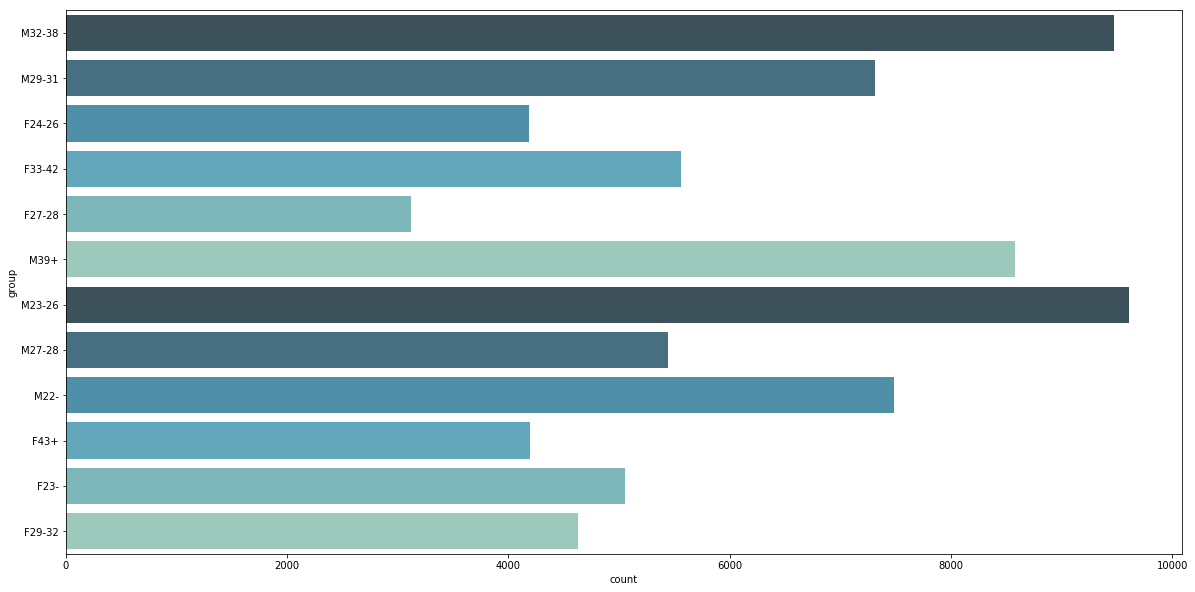

In [4]:
plt.figure(figsize=(20,10))

palette = sns.color_palette('GnBu_d')

           
sns.countplot(y='group', data=df_train, palette=palette)
plt.show()

# Age Distribution
Overall it looks like the age distribution by sex is fairly similar. Just that there's a lot more males in general.

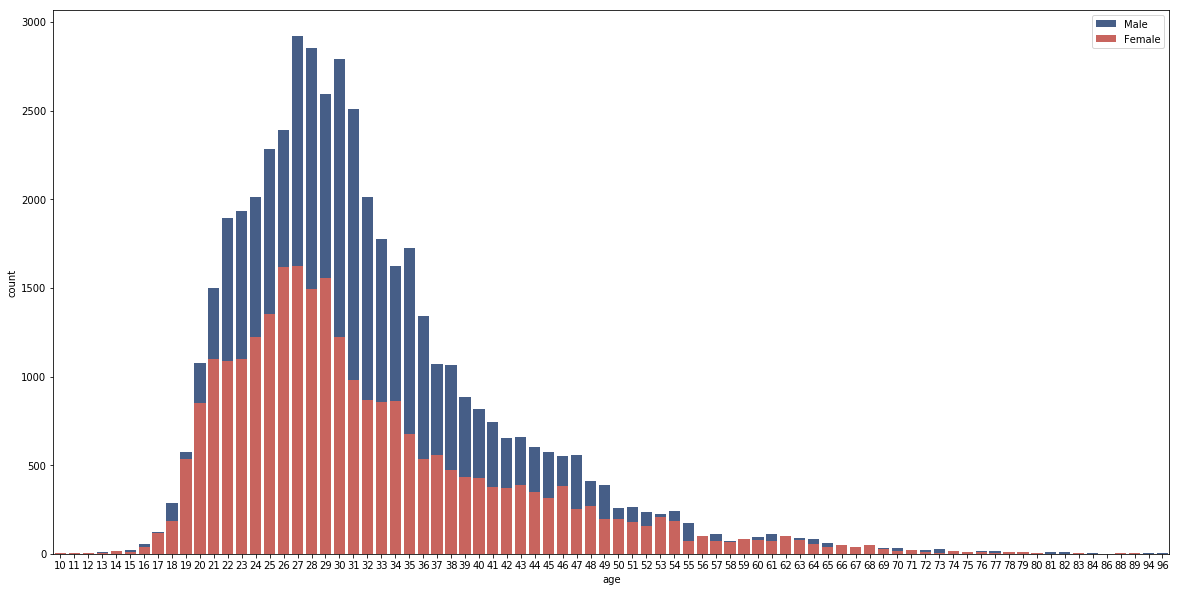

In [16]:
female_df = df_train[df_train['gender'] == 'F']
male_df = df_train[df_train['gender'] == 'M']

fig, ax = plt.subplots(figsize=(20,10))
g = sns.countplot(male_df['age'], color=sns.xkcd_rgb['denim blue'], ax=ax, label='Male')
g2 = sns.countplot(female_df['age'], color=sns.xkcd_rgb['pale red'], ax=ax, label='Female')
plt.legend()
plt.show()

### Loading in more data

In [17]:
df_labels = pd.read_csv('data/mobile_data/label_categories.csv')
df_events = pd.read_csv('data/mobile_data/events.csv')
df_app_labels = pd.read_csv('data/mobile_data/app_labels.csv')
df_app_events = pd.read_csv('data/mobile_data/app_events.csv')
df_brand = pd.read_csv('data/mobile_data/phone_brand_device_model.csv')

### Creating a Dataframe That Incldues the Type of Phone

In [18]:
df_phones = pd.merge(df_train, df_brand, left_on='device_id', right_on='device_id')

# Checking for missing values
df_phones.isna().sum()

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

The data appears to be fairly clean and there's no missing values.

### Collecting Relevant Information From the New Dataframe

In [19]:
print(f'The number of unique brands {df_phones.phone_brand.unique().shape[0]}')
print(f'The number of unique models {df_phones.device_model.unique().shape[0]}')
print(f'Number of entries {df_phones.shape[0]}')
df_phones.head(10)

The number of unique brands 120
The number of unique models 1438
Number of entries 74839


,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,小米,红米note
4,245133531816851882,M,30,M29-31,小米,MI 3
5,-1297074871525174196,F,24,F24-26,OPPO,R1C
6,236877999787307864,M,36,M32-38,酷派,F2
7,-8098239495777311881,M,38,M32-38,小米,红米note
8,176515041953473526,M,33,M32-38,vivo,X3T
9,1596610250680140042,F,36,F33-42,三星,Galaxy S4


### Creating Top 20 Brands Dataset
By selecting only the top 20 brands of 120, the dataframe's size only reduced 2182 rows while significantly trimming down on the number of brands. This leads me to believe that there's many small phone manufacturers. This could be harmful in truly understanding the demographics of users, but it's a trade off for easily interpretable data. Further hypothesis testing can be done on the full dataset to see if findings on the smaller dataset hold true.

In [20]:
# Ordered list from most to least. I'll select the top 20 to make this easier to interpret
top_brands = df_phones['phone_brand'].value_counts()
top_20 = top_brands.index[0:20]

# Creating a new dataframe that includes just these brands
df_top = df_phones[df_phones['phone_brand'].isin(top_20)]
print(f'Number of entries {df_top.shape[0]}')
df_top.head()

Number of entries 72657


,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,小米,红米note
4,245133531816851882,M,30,M29-31,小米,MI 3


### Phone Brand by Gender
A key takeaway is that there's only 1 phone manufacturer in the top 20 that has more female owners than males. It's also one of the least purchased brands among the top 20. It's difficult to say with any certainty but OPPO and Vivo might be more preferable to females. Given the large difference in gender population it's interesting that these two companies have a balanced clientele.

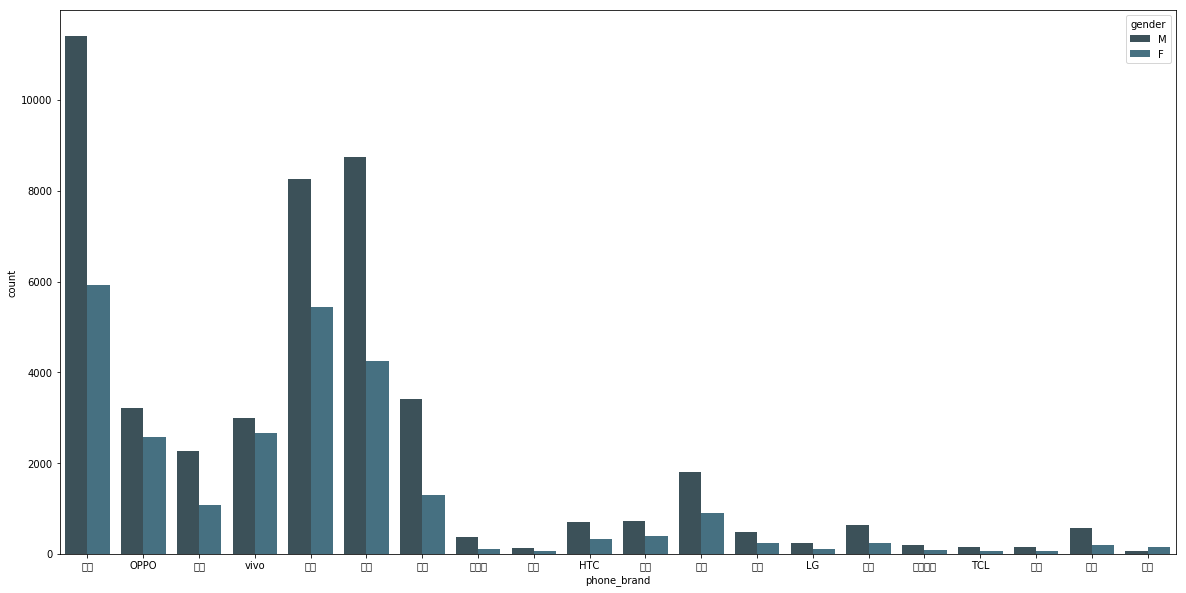

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='phone_brand', hue='gender', data=df_top, palette=palette)
plt.show()

### Phone Brand by Age
It's hard to takeaway much from this graph. It appears all phone manufacturers have a median customer age slightly younger than 30. This makes sense given the distribution found earlier and that the average age is 29.

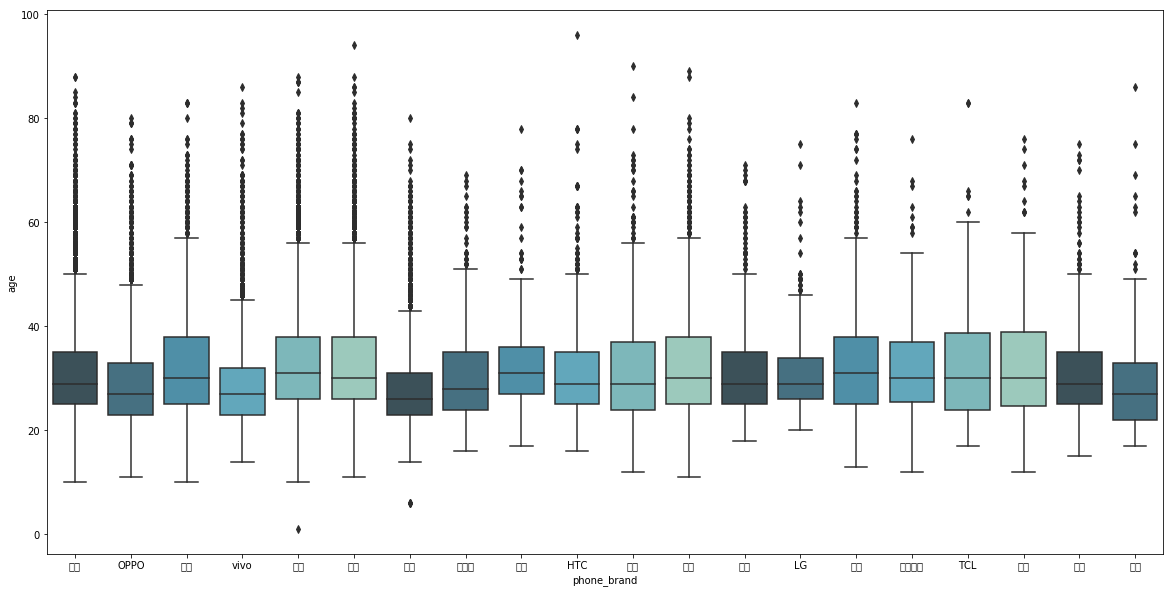

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x='phone_brand', y='age', data=df_top, palette=palette)
plt.show()

# Unsupervised Learning
After encoding the data I'll use K-Means and remove some columns from the top 20 dataset. Below I have previewed the data that will be passed into the clustering algorithm. Hopefully we can gain some insight as to the age demographic of the user.

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans


# Preparing data for clustering
X = df_top.drop(['gender', 'group', 'device_id'], 1)
y = df_top.group

enc = OrdinalEncoder()

X_enc = enc.fit_transform(X)

# Previewing encoder
X_enc[0]

X.head()

,age,phone_brand,device_model
0,35,小米,MI 2
1,35,小米,MI 2
2,35,小米,MI 2
3,30,小米,红米note
4,30,小米,MI 3


# Finding Optimal Amount of Clusters Using Silhouette Scores
This serve as a quick way to find how many clusters should be used. The silhouette score compares how similar the data is within the given cluster compared to the other clusters. A higher score is better

In [20]:
from sklearn.metrics import silhouette_score

cluster_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-2)
    pred = kmeans.fit_predict(X_enc)
    score = silhouette_score(X_enc, pred, metric='euclidean')
    
    print(f'Clusters: {k}\tScore: {score}')

Clusters: 2	Score: 0.7274473755237111
Clusters: 3	Score: 0.694592770746738
Clusters: 4	Score: 0.6889601260717113
Clusters: 5	Score: 0.6851078299576949
Clusters: 6	Score: 0.7104578630536404
Clusters: 7	Score: 0.7285231155308719
Clusters: 8	Score: 0.7325324516904993
Clusters: 9	Score: 0.7044591568391612
Clusters: 10	Score: 0.7052521252774635


# Graphing The 3 Best Performing Clusters - Genders

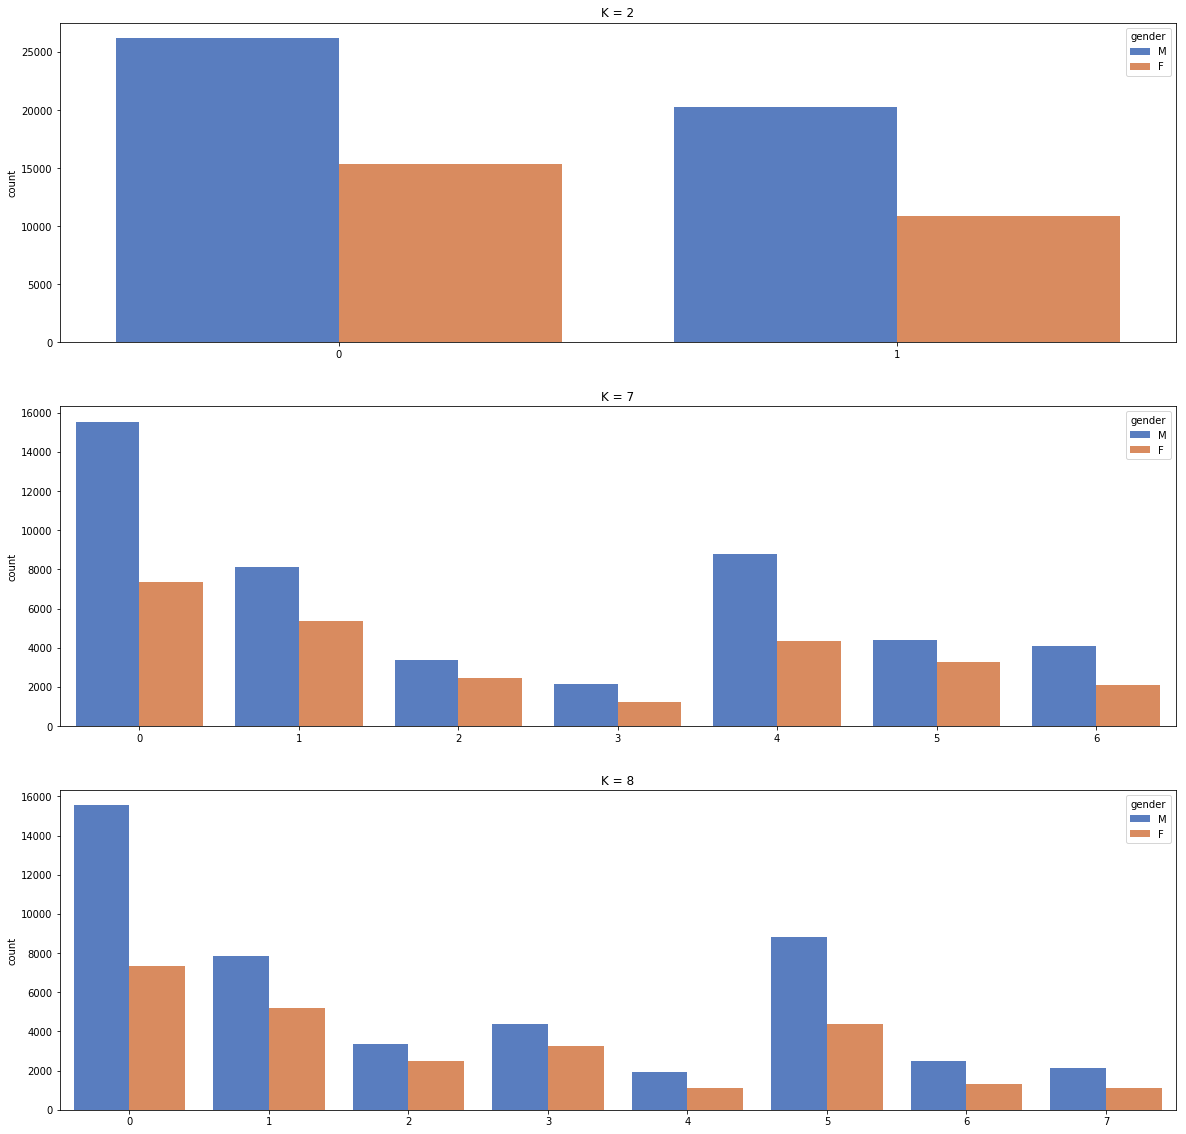

In [27]:
# Highest performing Kmeans
k2 = KMeans(n_clusters=2, random_state=42, n_jobs=-1).fit_predict(X_enc)
k7 = KMeans(n_clusters=7, random_state=42, n_jobs=-1).fit_predict(X_enc)
k8 = KMeans(n_clusters=8, random_state=42, n_jobs=-1).fit_predict(X_enc)

# Setting up Axes
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Plotting
sns.countplot(x=k2, hue=df_top.gender, ax=ax1, palette='muted')
sns.countplot(x=k7, hue=df_top.gender, ax=ax2, palette='muted')
sns.countplot(x=k8, hue=df_top.gender, ax=ax3, palette='muted')

# Adding Titles
ax1.title.set_text('K = 2')
ax2.title.set_text('K = 7')
ax3.title.set_text('K = 8')

plt.show()

### Analysis
Gender to cluster isn't providing a very deep perspective or shedding any light on the demographic issue. None of the clusters here to me provdie any valuable information. 

# Graphing The 3 Best Performing Clusters - Age Groups

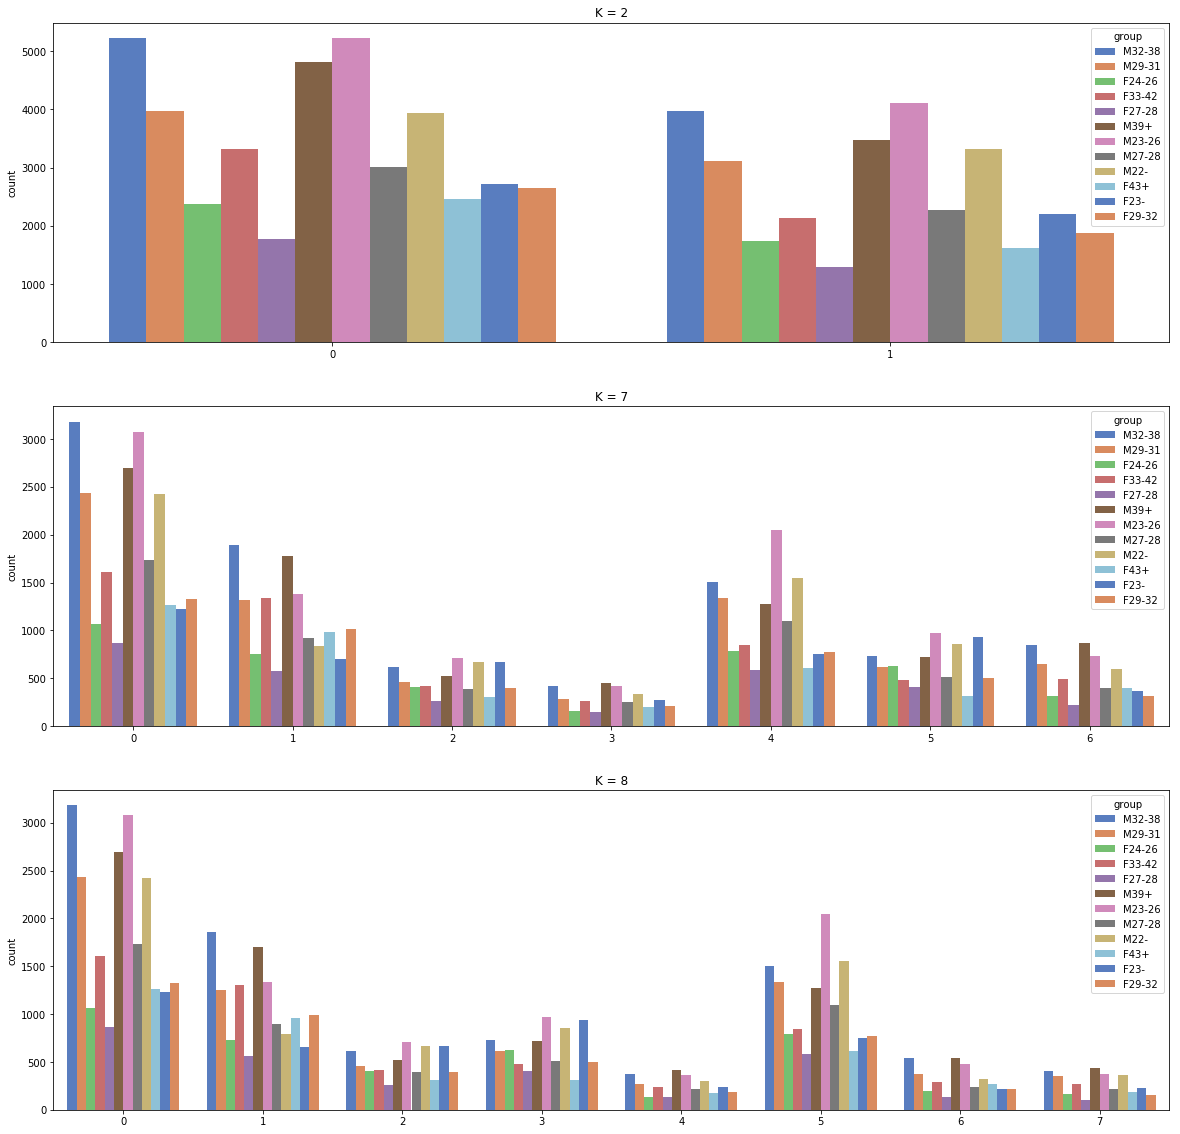

In [29]:
# Setting up Axes
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Plotting
sns.countplot(x=k2, hue=y, ax=ax1, palette='muted')
sns.countplot(x=k7, hue=y, ax=ax2, palette='muted')
sns.countplot(x=k8, hue=y, ax=ax3, palette='muted')

# Adding Titles
ax1.title.set_text('K = 2')
ax2.title.set_text('K = 7')
ax3.title.set_text('K = 8')

plt.show()

# Conclusion
Overall clustering seems to not shed much light on user demographic with this current approach. Cluster 0 in the k = 7 and k = 8 graphs are the most male dominated clusters. Cluster 4 in the k = 7 graph is very interesting. It appears to have almost a 500 count lead, being the largest lead of a member of any cluster. There might be some helpful clues to the M23-26 demographic located within this cluster.

I don't believe that unsupervised learning will make any meaningful advances in understanding clues towards owner demographics. The next step would be to find some more features that will be fed into a model. There might be enough data here for a shallow deep learning model to be looked at as a viable solution. The approach I would be most interested in is using a XGBoost or LightGBM model. If these gradient boosting models perform well using their feature importance functionality could give a strong insight into demographic indicators. 